In [1]:
import plotly.express as px

from common.explore import display_sql

In [2]:
df = display_sql(f'''
SELECT online_at,
       SUM(total_jobs) AS total_jobs
  FROM aggregated_online_job
 WHERE location_name = 'Walldorf'
 GROUP BY 1
 ORDER BY 1
''')
df

,online_at,total_jobs
0,2021-10-09,118.0
1,2021-10-10,118.0
2,2021-10-11,115.0
3,2021-10-12,120.0
4,2021-10-13,120.0
...,...,...
359,2022-10-03,127.0
360,2022-10-04,138.0
361,2022-10-05,138.0
362,2022-10-06,175.0


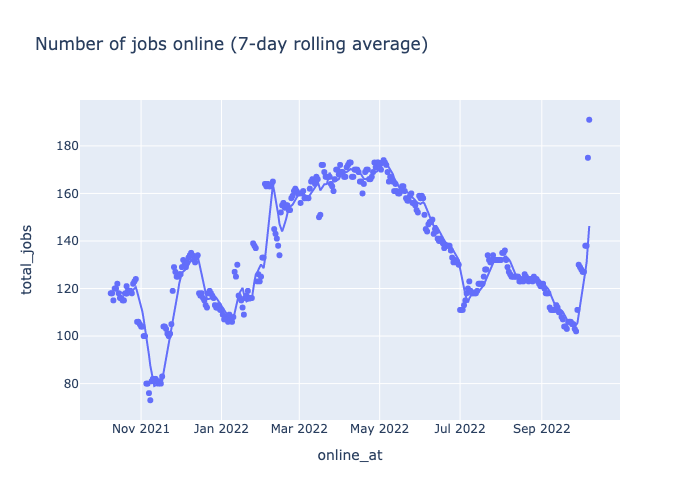

In [3]:
fig = px.scatter(df, x='online_at', y='total_jobs', trendline='rolling', trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show('png')

In [4]:
display_sql(f'''
SELECT company_name,
       SUM(total_jobs) AS total_jobs
  FROM aggregated_online_job
 WHERE company_name ilike '%sap%'
 GROUP BY 1
 ORDER BY 2 DESC
''')

,company_name,total_jobs
0,ASAP Engineering GmbH,38791.0
1,ASAP Holding GmbH,14684.0
2,SAP SE,6742.0
3,ASAP Electronics GmbH,6227.0
4,RED SAP Solutions,1077.0
5,SAPROS GmbH,1046.0
6,SAP AG,1004.0
7,SENSAPOLIS GmbH,1002.0
8,SAPHIR Maschinenbau GmbH,566.0
9,Sappi Deutschland GmbH,488.0


In [5]:
df = display_sql(f'''
SELECT online_at,
       SUM(total_jobs) AS total_jobs
  FROM aggregated_online_job
 WHERE company_name = 'SAP SE'
    OR company_name = 'SAP AG'
 GROUP BY 1
 ORDER BY 1
''')

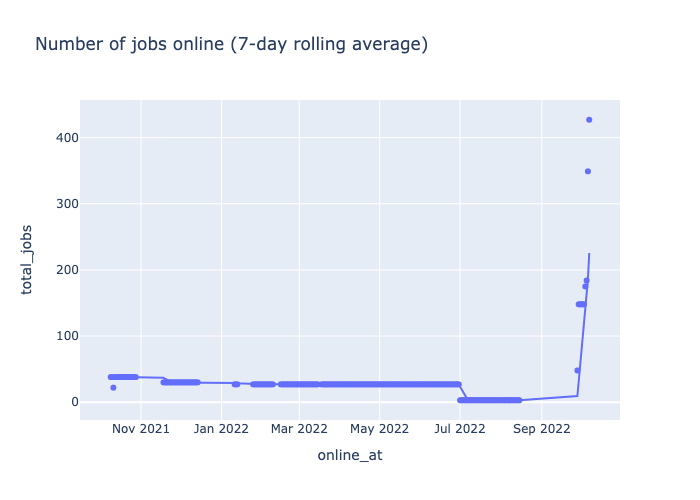

In [6]:
fig = px.scatter(df, x='online_at', y='total_jobs', trendline='rolling', trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show('png')

In [7]:
display_sql(f'''
SELECT company_name,
       MAX(total_jobs) AS total_jobs
FROM (
    SELECT company_name,
           online_at,
           MAX(total_jobs) AS total_jobs
      FROM aggregated_online_job
     GROUP BY 1, 2
)
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
''')

,company_name,total_jobs
0,Deutsche Bahn AG,973
1,ZEISS,589
2,PwC,561
3,Bosch Gruppe,534
4,Deloitte,436
5,Schwarz Dienstleistungen,406
6,adidas AG,402
7,Ernst & Young GmbH Wirtschaftsprüfungsgesellsc...,399
8,BMW Group,391
9,StepStone GmbH,376


In [8]:
display_sql(f'''
SELECT location_name,
       MAX(total_jobs) AS total_jobs
FROM (
    SELECT location_name,
           online_at,
           MAX(total_jobs) AS total_jobs
      FROM aggregated_online_job
     GROUP BY 1, 2
)
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
''')

,location_name,total_jobs
0,Frankfurt am Main,973
1,Berlin,697
2,Oberkochen,589
3,Düsseldorf,541
4,Stuttgart,534
5,München,474
6,Oberkochen (Baden-Württemberg),422
7,Neckarsulm,406
8,Herzogenaurach,402
9,Main,390
